<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/241111_%EA%B3%BC%EC%A0%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04 모델 세부 설정**

In [7]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

# 데이터 정규화
x_train=x_train/x_train.max() # max : 255
x_test=x_test/x_test.max() # max : 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


## **4-1 초기값 설정**

레이어의 초기화 방법을 다르게 설정할 수 있다.
* Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정되어 있다.

In [8]:
dense=tf.keras.layers.Dense(1256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 `kernel_initializer` 매개변수에 설정하면 된다.
* 옵티마이저, 손실함수와 마찬가지로 문자열로 지정하는 방법과 클래스 인스턴스로 지정하는 방법이 있다.

In [9]:
# 문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


케라스에서 지원하는 자주 사용되는 초기화 목록
* 'glorot_normal', 'glorot_uniform' : 글로럿 초기화(Xavier 초기화)
* 'lecun_normal', 'lecun_uniform' : Yann Lecun 초기화
* 'he_normal', 'he_uniform' : He 초기화
* 'random_normal', 'random_uniform' : 정규 분포, 연속균등 분포 초기화

## **4-2 규제(Regularization)**

모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.
* 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있다.

In [10]:
# 기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_12',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

모델이 과대적합하는 것을 방지해 주기 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있다.
* 케라스에서 지원하는 규제는 L1, L2 규제가 있다.
* 규제를 적용하기 위해서는 `kernel_regularizer`에 규제를 지정하면 된다.

In [11]:
# L1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용. alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


## **4-3 드롭아웃(Dropout)**

딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있다. 따라서 훈련할 때 만나지 못한 새로운 데이터에 대해서는 좋지 않는 예측력을 보일 때가 많다.

▶ 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 갖지 못하는 문제가 자주 발생하는 편이다.

▶ 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이다.

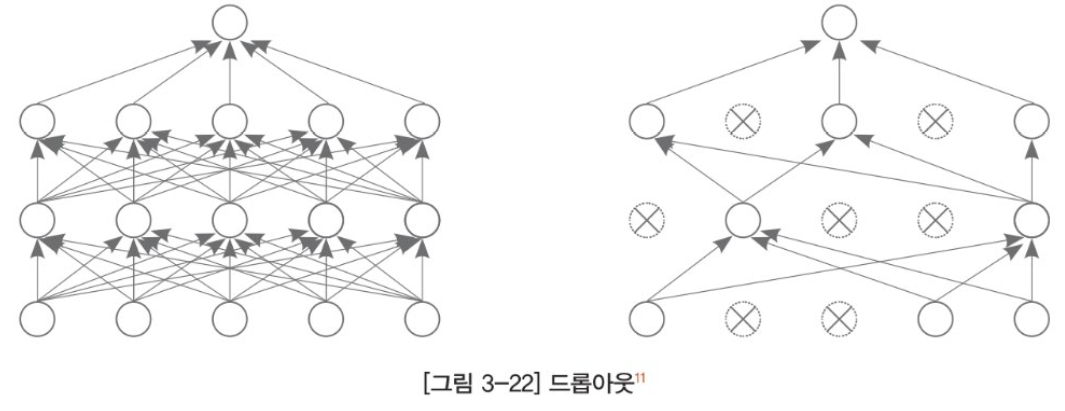

왼쪽 그림에는 모든 노드들이 연결되어 있다. 오른쪽 그림은 모든 노드가 연결되어 있지 않고 확률적으로 몇 개의 신호는 끊겨 있다. 이렇게 노드의 일부 신호를 임의로 삭제하게 되면, 모델이 쉽게 과대적합되는 것을 방지할 수 있다. 모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들게 되기 때문이다.

📌 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용된다.

`Dropout` 레이어 함수에 입력하는 숫자는 노드에서 제거되는 비율을 나타낸다.


In [12]:
# Dropout 25% 비율 적용(25%의 노드가 삭제됨)
tf.keras.layers.Dropout(0.25)

<Dropout name=dropout, built=False>

## **4-4 배치 정규화(Batch Normalization)**

* 2015년 세르게이 이오페, 크리스티안 세게디가 제안한 개념
* 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화한다. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있다.
* 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드를 구현할 필요가 없다.
  * 클래스 인스턴스 생성 후 추가

* `model_a` : Dense 레이어에 ReLU 활성화 함수를 추가한 모델
* `model_b` : 배치 정규화 적용 후 ReLU 활성화 함수를 추가한 모델

In [13]:
import tensorflow as tf

# Model A : Dense + ReLU
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model B : Dense + BatchNorm + ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model_b.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

동일한 조건에서 10번의 `eooch`동안 `model_a`, `model_b` 두 모델을 훈련한 결과

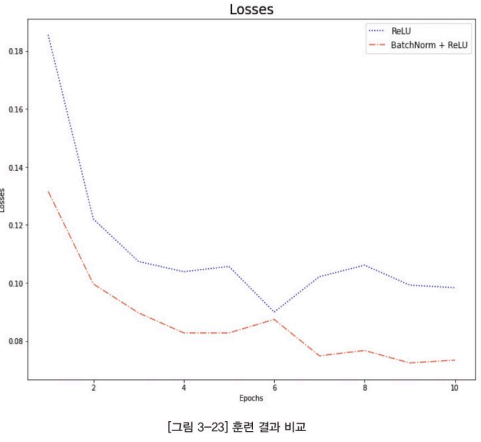

배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것을 확인할 수 있다.

데이터 개수가 적은 편인 `mnist` 손글씨 데이터셋에서는 큰 차이를 보이지 않을 수 있지만, 더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적용해 볼 필요가 있다.

## **4.5 활성화(activation) 함수**

In [15]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<LeakyReLU name=leaky_re_lu_5, built=False>

In [16]:
# Model C : Dene + BatchNorm + LeakyReLU(0.2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

생성한 2개의 모델과 LeakyReLU 활성화 함수로 변경한 모델까지 더해서 총 3개의 모델을 동일한 조건으로 10번의 `epoch` 동안 훈련한 후 수렴 속도를 확인한다.
* `model_a` : `Dense` 레이어 + `ReLU` 함수
* `model_b` : `Dense` 레이어 + 배치 정규화
* `model_c` : `Dense` 레이어 + `LeakyReLU(0.2)` 활성화 함수

In [17]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

# Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

# Model C : Dense + BatchNorm + LeakyReLU(0.2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8484 - loss: 0.5214 - val_accuracy: 0.9529 - val_loss: 0.1618
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9579 - loss: 0.1455 - val_accuracy: 0.9623 - val_loss: 0.1268
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9688 - loss: 0.1030 - val_accuracy: 0.9676 - val_loss: 0.1082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9763 - loss: 0.0773 - val_accuracy: 0.9677 - val_loss: 0.1020
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9809 - loss: 0.0610 - val_accuracy: 0.9731 - val_loss: 0.0887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9842 - loss: 0.0496 - val_accuracy: 0.9718 - val_loss: 0.1014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9716 - val_loss: 0.0986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9888 - loss: 0.03

`epoch`별 검증 손실의 감소 추이 확인

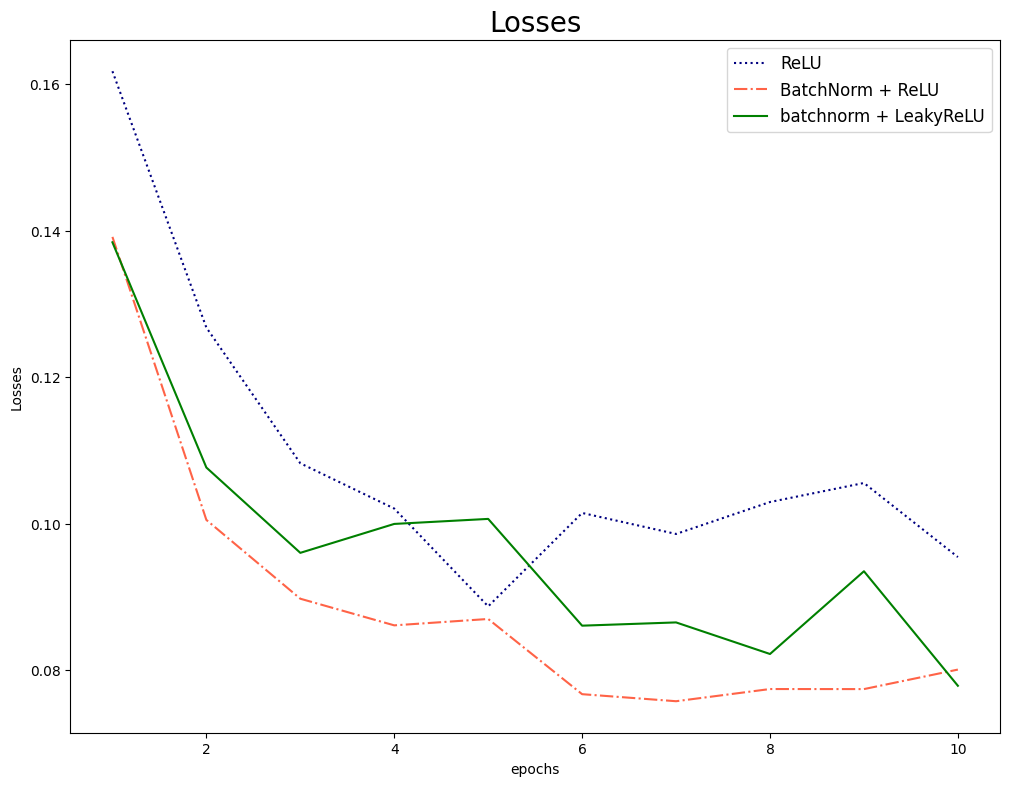

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorm + LeakyReLU'], fontsize=12)
plt.show()

**배치 정규화**와 다른 **활성화 함수**를 적용해 보면서 모델의 훈련 추이를 관찰해 볼 필요가 있다.

# **06. 모델 저장 및 불러오기**

앞에서 사용한 신경망 모델을 활용하여 모델 훈련을 완료한다.

In [20]:
def scheduler(epoch, lr):
  tf.print(f'learning_rate : {lr:.5f}')
  # 첫 5 epoch 동안 유지
  if epoch < 5:
    return lr
  else:
    # 학습률 감소 적용
    return lr + tf.match.exp(-0.1)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [21]:
import tensorflow as tf

# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 데이터 정규화
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

# 모델 정의
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드가 10개가 되어야 한다.
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8761 - loss: 0.4258 - val_accuracy: 0.9658 - val_loss: 0.1113
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9694 - loss: 0.0973 - val_accuracy: 0.9668 - val_loss: 0.1088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9800 - loss: 0.0638 - val_accuracy: 0.9706 - val_loss: 0.0964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9760 - val_loss: 0.0855
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.9725 - val_loss: 0.0891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.9802 - val_loss: 0.0805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9789 - val_loss: 0.0841
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9924 - loss: 0

## **6-1 모델을 파일로 저장**

가중치가 업데이트된 모델 인스턴스를 저장한다.
* `save()` 메소드를 사용한다. `save()` 메소드를 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정한다.
  * HDF5, SavedModel 포맷

모델을 저장할 파일명이 `.h5` 확장자를 포함하는 경우는 모델이 `HDF5`(Hierarchical Data Format) 포맷으로 저장한다.
* `HDF5` 파일 형식 : 대용량의 데이터를 저장하기 위한 파일 형식

In [33]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

## **6-2 저장된 모델 복원**

`tensorflow.keras.models.load_model()` 메소드 : 저장된 모델 복원. 저장된 `HDF5` 파일 형식의 모델을 복원하여 `summary()`를 확인하면 모델 구조가 그대로 복원되어 있다.

In [34]:
# 모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,820 (858.68 KB)

 Trainable params: 219,818 (858.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

검증 셋을 `evaluate` 함수에 대입하여, 손실 함수와 평가지표를 계산한다.

In [35]:
# 모델 검증
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss : {loss:.5f}, acc : {acc:.5f}')

h5 model] loss : 0.10296, acc : 0.97730


# **07. 복잡한 모델 생성**

## **7-1 함수형 API(Functional API)**

* 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다.
* 여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있다.

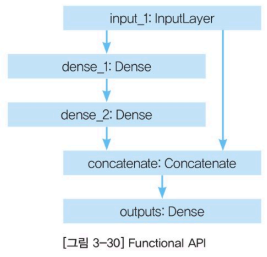

함수의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 `return` 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능하다.

`Sequential API`를 사용하는 경우 단방향의 `Sequential` 모델만 구현할 수 있다는 제약이 있다. 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델을 구현할 수 없다.

`Input` 레이어를 정의한다. `Input` 레이어에 데이터의 입력 `shape`을 정의한다. 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결한다.

▶ 체인 구조로 입출력을 계속 연결할 수 있다.

In [42]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

레이어마다 `name` 매개변수로 이름을 부여할 수 있다.
* 모델 인스턴스에 대하여 `summary()`로 요약 출력할 때 이름이 함께 출력된다.
  * 첫 `Input` 레이어로 시작하여 `x4` 변수는 마지막 출력층을 나타낸다.
  * 이렇게 체인 방식으로 연결한 후에 `tf.keras.Model()`에 입력 레이어와 출력 레이어를 정의해 모델을 생성한다.

In [43]:
# 모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

`tf.keras.Model()`에 `inputs` 매개변수로 입력층인 `input_layer`를 지정하고 `outputs` 매개변수에 출력층을 지정해주어 모델을 생성한다. 모델 인스턴스 생성 시 `name` 매개변수에 이름을 지정하면 해당 이름이 `summary()`에 출력된다.

지금까지는 `summary()`로 모델의 요약을 확인했다. 하지만 복잡한 구조를 갖는 모델을 생성할 때 `summary()`로는 모델의 구조도를 시각화하기 어렵다. 케라스의 유틸 패키지에서 제공하는 `plot_model` 모듈을 활용하여 모델의 구조도를 시각화할 수 있다.

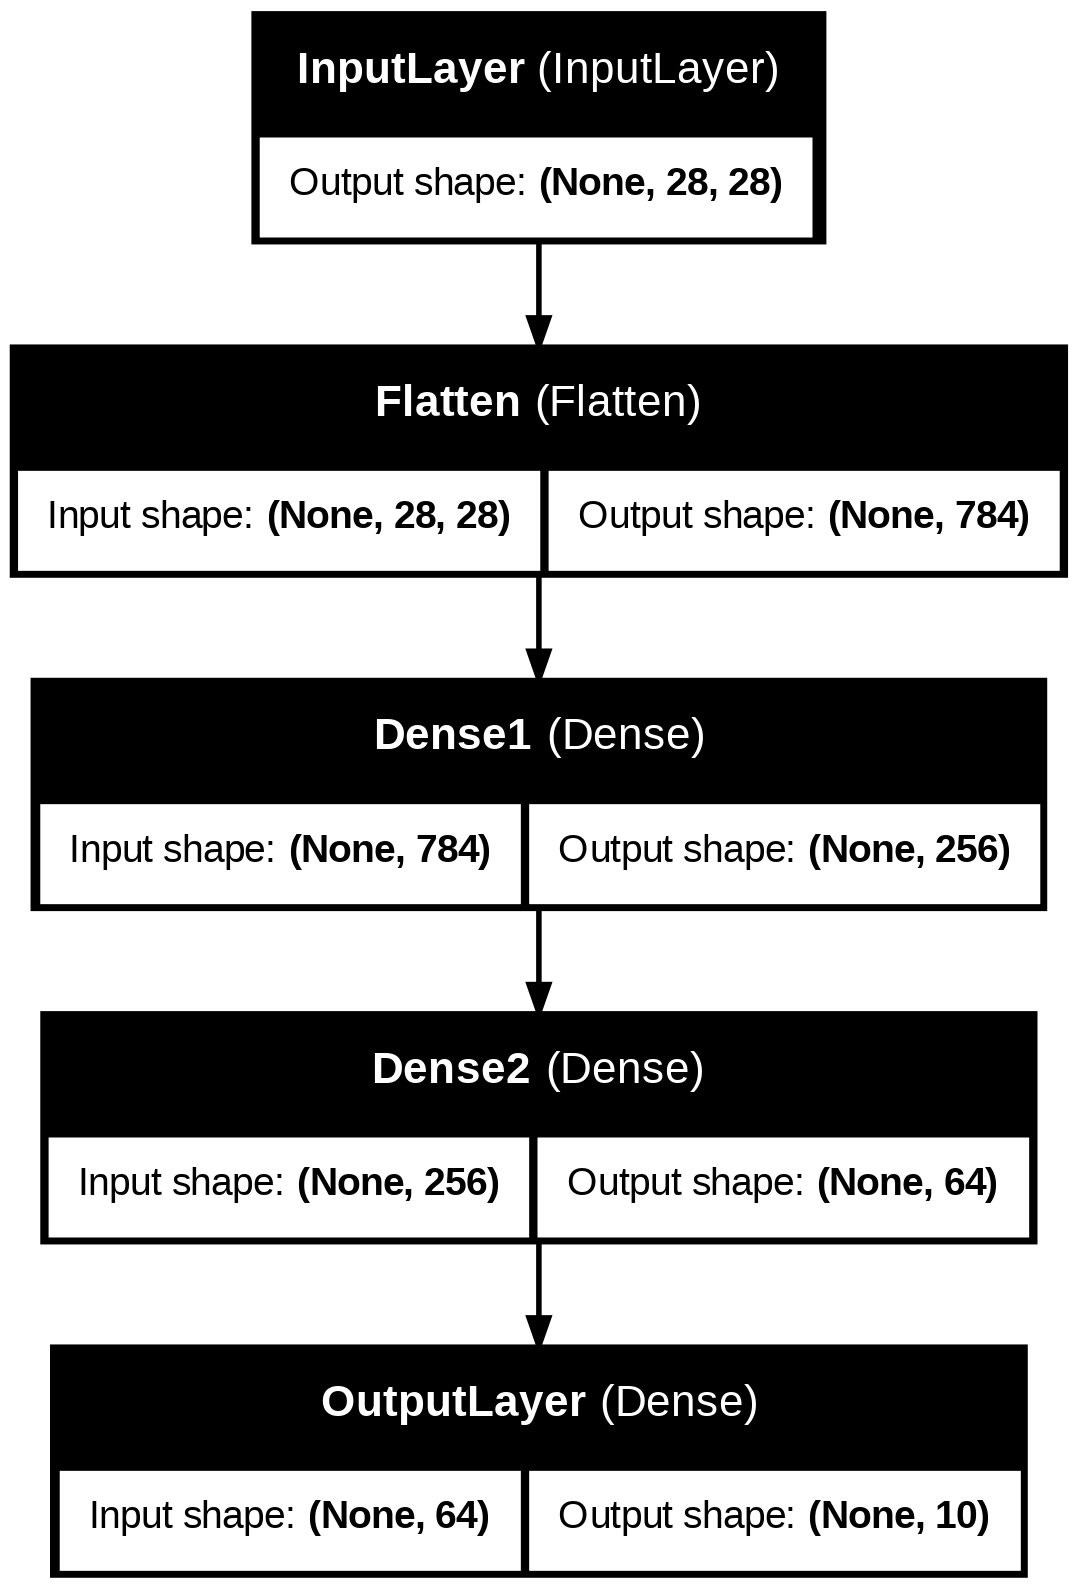

In [44]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

`plot_model()`에 모델을 지정하면 구조도가 출력된다.
* `show_shapes=True`로 지정하면 데이터의 입출력 `shape`을 출력
*  `show_layer_names=True`로 지정하면 레이어의 이름 출력
* 시각화한 구조도를 `to_file` 매개변수에 파일명을 입력하면 이미지 파일로 저장도 가능하다.

함수형 API로 생성한 모델도 `Sequential API`로 생성한 모델과 동일한 방식으로 훈련할 수 있다. 생성된 모델 인스턴스에 `compile()` 메소드로 모델을 컴파일하고 `fit()` 메소드로 모델을 훈련한다. 훈련이 완료된 뒤 `evaluate()` 메소드로 검증할 수 있다.

In [45]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss : {loss:.5f}, acc : {acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8854 - loss: 0.3743
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9719 - loss: 0.0926
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9821 - loss: 0.0569
Functional Model] loss : 0.07629, acc : 0.97600


## **모델 서브클래싱(Model Subclassing)**

텐서플로 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있다. 이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다.

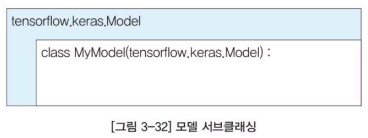

▶ 이 방법은 파이썬 클래스 개념을 잘 이해하고 있다면 가장 추천하는 방법이다. 하지만 객체지향이나 파이썬 클래스의 개념이 부족하다면 굳이 Model Subclassing으로 모델을 구현하지 않아도 좋다. 함수형 API로 생성한 모델과의 성능 차이는 없다.

Model Subclassing으로 모델 인스턴스를 생성하기 위해서는 `tf.keras.Model`를 상속받아 생성하고자 하는 모델 클래스를 구현한다.

모델의 `__init__()` 함수에 레이어를 정의하고, 레이어의 하이퍼파라미터를 정의한다.

In [49]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

`call()` 함수를 메소드 오버라이딩으로 구현한다. `call()` 메소드는 `fit()` 메소드가 호출되어 훈련하는 경우 호출될 함수이다. `call()` 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결한다. 마지막으로 최종 출력 값을 `return`한다.

In [50]:
# 모델 생성
mymodel=MyModel()

# 모델 이름 설정
mymodel._name='subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

`tf.keras.Model`을 상속받아 구현한 모델인 `MyModel`을 생성자로 인스턴스를 생성한다. 모델에 이름을 부여하고 싶다면 모델 인스턴스의 `_name`에 이름을 지정한다. 생성자로 객체를 생성해 저장한 mymodel 변수에 바로 `summary()`로 요약 출력하는 것은 불가하다. `input_shape`이 정의되지 않았기 때문에 전체 모델의 구조를 생성해내지 못하기 때문이다. `mymodel`에 Input 레이어와 함께 `shape`을 정의해주면 `summary()`로 모델의 요약을 확인할 수 있다.

In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss : {loss:.5f}, acc : {acc:.5f}')

Model Subclassing으로 생성된 모델의 훈련도 동일하게 `compile()` 메소드로 컴파일 후 `fit()` 메소드로 훈련한다.

▶ 함수형 API로 생성한 모델, Model Subclassing으로 생성한 모델 모두 동일한 `compile()` 메소드와 `fit()` 메소드로 훈련할 수 있다. `evaluate()` 메소드로 모델 성능을 검증할 수도 있다. 단지 모델을 생성하는 방식에 차이가 있을 뿐이다.

## **7-3 서브클래싱 모델 파라미터를 활용한 생성**

장점 : 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다.

* 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제

In [55]:
class MyModel(tf.keras.Model):
  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units//4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

모델의 생성자 파라미터로 기준이 되는 `unit`의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정한다.

In [56]:
# 모델 생성
mymodel=MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

* 조건문과 반복문을 추가하여 보다 더 동적인 모델을 생성하는 것도 가능하다. 또한 활성화 함수도 쉽게 변경할 수 있도록 코드를 변경할 수 있다.

* 동적으로 설정한 레이어의 파라미터가 초기화되었음을 알 수 있다.

In [57]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss : {loss:.5f}, acc : {acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8922 - loss: 0.3654
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9747 - loss: 0.0836
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9819 - loss: 0.0575
Subclassing Model w. parameters] loss : 0.08367, acc : 0.97400
